## 对email进行二分类，两种邮件分别在ham和spam目录下

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from pandas import DataFrame,Series
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer
import os

In [292]:
# 利用os模块,进入需求目录
# 利用glob函数获取当前目录下所有以 .txt 结尾的文件的文件名
ham = []
spam = []
target = []
os.chdir(r'../ham')
for fname in glob.glob(r'*.txt'):
    with open('%s'%fname,encoding='UTF-8',errors='ignore') as file:
        email = file.read()
        ham.append(email)
        target.append('ham')

In [293]:
# 同理
os.chdir(r'../spam')
for fname in glob.glob(r'*.txt'):
    with open('%s'%fname,encoding='UTF-8',errors='ignore') as file:
        email = file.read()
        spam.append(email)
        target.append('spam')

In [2]:
ham = []
spam = []
for i in range(1,26):
    with open('./email/ham/%d.txt'%i,encoding='utf-8', errors='ignore', mode='r') as file1:
        ham.append(file1.read())
        
    with open('./email/spam/%d.txt'%i, encoding='utf-8', errors='ignore', mode='r') as file2:
        spam.append(file2.read())
        

In [5]:
target = ['ham'] * 25 + ['spam'] * 25

In [7]:
data = np.array(ham + spam)

In [8]:
data

array(['Hi Peter,\n\nWith Jose out of town, do you want to\nmeet once in a while to keep things\ngoing and do some interesting stuff?\n\nLet me know\nEugene',
       "Yay to you both doing fine!\n\nI'm working on an MBA in Design Strategy at CCA (top art school.)  It's a new program focusing on more of a right-brained creative and strategic approach to management.  I'm an 1/8 of the way done today!",
       "WHat is going on there?\nI talked to John on email.  We talked about some computer stuff that's it.\n\nI went bike riding in the rain, it was not that cold.\n\nWe went to the museum in SF yesterday it was $3 to get in and they had\nfree food.  At the same time was a SF Giants game, when we got done we\nhad to take the train with all the Giants fans, they are 1/2 drunk.",
       "Yo.  I've been working on my running website.  I'm using jquery and the jqplot plugin.  I'm not too far away from having a prototype to launch.  \n\nYou used jqplot right?  If not, I think you would like it

In [4]:
len(ham)

25

In [294]:
display(len(ham),len(spam),len(target))

25

25

50

In [295]:
# 将spam的值追加到ham后
ham.extend(spam)
len(ham)

50

In [296]:
# 把字符串转换成矩阵
tf = TfidfVectorizer()

In [297]:
tf.fit(ham)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [298]:
# 转化
X_train = tf.transform(ham).toarray()

In [299]:
X_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.43716362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2907882 , 0.        ,
        0.        ],
       [0.43716362, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [300]:
tf.fit_transform(ham)

<50x748 sparse matrix of type '<class 'numpy.float64'>'
	with 1669 stored elements in Compressed Sparse Row format>

In [301]:
# 训练数据
target

['ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam',
 'spam']

In [302]:
x_train,x_test,y_train,y_test = train_test_split(X_train,target,test_size = 0.5)

In [303]:
# 高斯分布
GS_NB = GaussianNB()
GS_NB.fit(x_train,y_train).score(x_train,y_train)

1.0

In [304]:
y_ = GS_NB.predict(x_test)

In [305]:
display(y_,y_test)

array(['ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam', 'ham', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam'], dtype='<U4')

['ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam']

In [306]:
GS_NB.score(x_test,y_test)

0.96

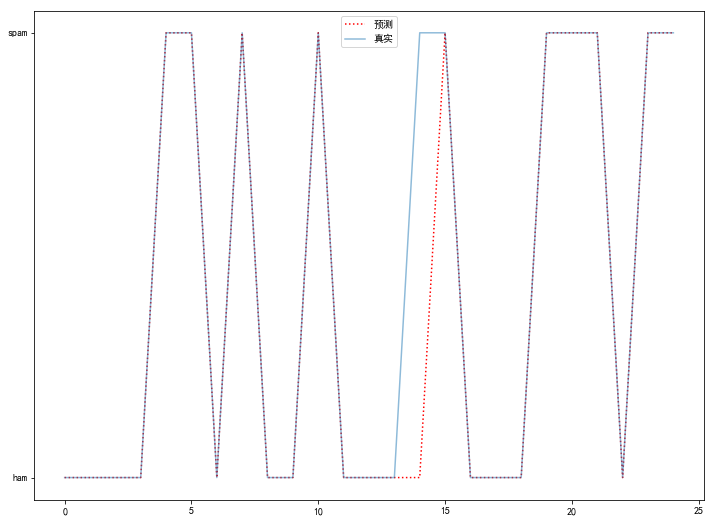

In [307]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] 
plt.figure(figsize=(12,9))
plt.plot(y_,label =u'预测',ls = ':',c='r')
plt.plot(y_test,label = u'真实',alpha = 0.5)
plt.legend(loc='upper center')

In [308]:
# 二项式分布
M_NB = MultinomialNB()
M_NB.fit(x_train,y_train).score(x_train,y_train)

1.0

In [309]:
y_ = M_NB.predict(x_test)

In [310]:
display(y_,y_test)

array(['ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'spam', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'spam', 'spam', 'spam', 'spam', 'spam', 'spam'], dtype='<U4')

['ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam']

In [311]:
M_NB.score(x_test,y_test)

0.8

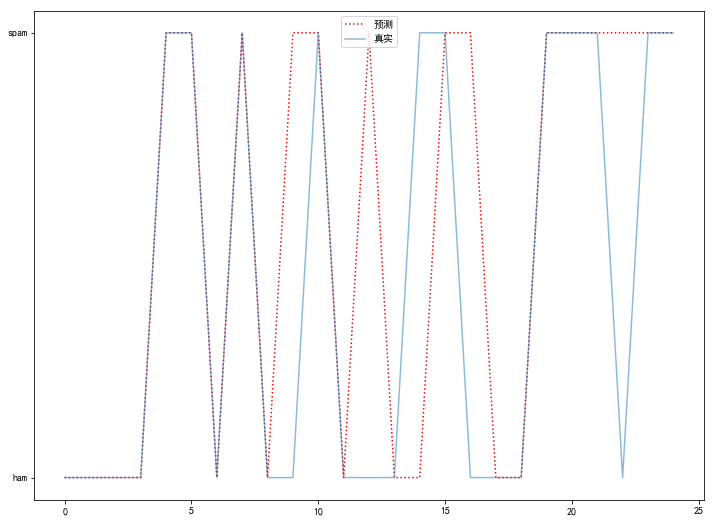

In [312]:
plt.figure(figsize=(12,9))
plt.plot(y_,label =u'预测',ls = ':',c = 'r')
plt.plot(y_test,label = u'真实',alpha = 0.5)
plt.legend(loc='upper center')

In [313]:
# 伯努利分布
B_NB = BernoulliNB()
B_NB.fit(x_train,y_train).score(x_train,y_train)

1.0

In [314]:
y_ = B_NB.predict(x_test)

In [315]:
display(y_,y_test)

array(['ham', 'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'ham',
       'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
       'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam'], dtype='<U4')

['ham',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'spam',
 'ham',
 'ham',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'ham',
 'ham',
 'ham',
 'spam',
 'spam',
 'spam',
 'ham',
 'spam',
 'spam']

In [316]:
B_NB.score(x_test,y_test)

0.88

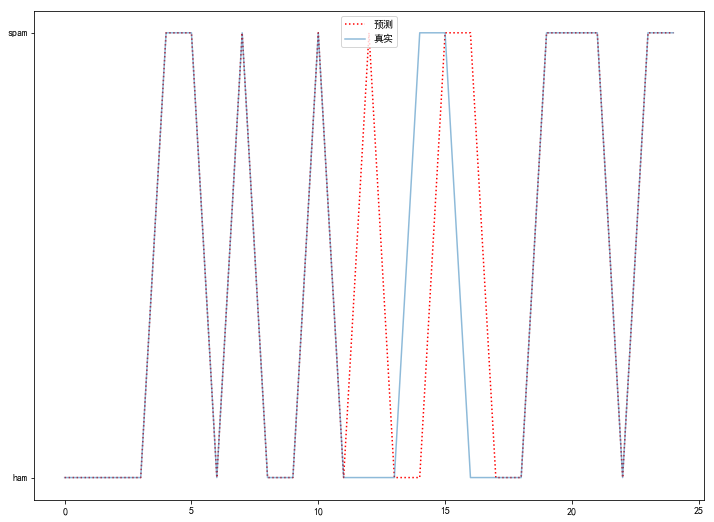

In [317]:
plt.figure(figsize=(12,9))
plt.plot(y_,label =u'预测',ls = ':',c = 'r')
plt.plot(y_test,label = u'真实',alpha = 0.5)
plt.legend(loc='upper center')

## 1、预测隐形眼镜的类型

### 分析lenses.txt文件

In [366]:
le = pd.read_csv('../../lenses.txt',sep='\t',header=None)
le.head()

,0,1,2,3,4
0,young,myope,no,reduced,no lenses
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,no lenses
3,young,myope,yes,normal,hard
4,young,hyper,no,reduced,no lenses


In [367]:
le.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [368]:
cols = [0, 1, 2, 3, 4]

In [369]:
for col in cols:
    uni = le[col].unique()
    def convert(item):
        index = np.argwhere(uni==item)[0,0]
        return index
    le.loc[:,col] = le[col].map(convert)

In [370]:
le.head()

,0,1,2,3,4
0,0,0,0,0,0
1,0,0,0,1,1
2,0,0,1,0,0
3,0,0,1,1,2
4,0,1,0,0,0


In [371]:
data = le.drop(columns=4)
target = le[4]
display(data.shape,target.shape)

(24, 4)

(24,)

In [372]:
#数据拆分
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size = 0.5)

In [373]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.linear_model import  LogisticRegression

In [374]:
# 使用决策树算法
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train).score(x_train,y_train)

1.0

In [377]:
y_dt = dt.predict(x_test)

In [379]:
display(y_dt,y_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0], dtype=int64)

13    1
19    2
12    0
16    0
4     0
14    0
1     1
8     0
15    0
9     1
22    0
2     0
Name: 4, dtype: int64

In [393]:
pd.crosstab(y_dt,y_test,margins=True,rownames=['预测'],colnames=['真实'])

真实,0,1,2,All
预测,,,,
0,7,0,1,8
1,0,3,0,3
2,1,0,0,1
All,8,3,1,12


In [394]:
dt.score(x_test,y_test)

0.8333333333333334

In [395]:
# 使用KNN算法
knn = KNeighborsClassifier()
knn.fit(x_train,y_train).score(x_train,y_train)

0.75

In [396]:
y_knn = knn.predict(x_test)

In [397]:
pd.crosstab(y_knn,y_test,margins=True,rownames=['预测'],colnames=['真实'])

真实,0,1,2,All
预测,,,,
0,7,2,1,10
2,1,1,0,2
All,8,3,1,12


In [398]:
knn.score(x_test,y_test)

0.5833333333333334

In [376]:
# 使用逻辑斯蒂算法
logic = LogisticRegression()
logic.fit(x_train,y_train).score(x_train,y_train)

0.8333333333333334

In [399]:
y_lo = knn.predict(x_test)

In [400]:
pd.crosstab(y_lo,y_test,margins=True,rownames=['预测'],colnames=['真实'])

真实,0,1,2,All
预测,,,,
0,7,2,1,10
2,1,1,0,2
All,8,3,1,12


In [402]:
logic.score(x_test,y_test)

0.6666666666666666

## 2、使用make_blobs产生数据，训练模型，并画出类别边界。

In [403]:
from sklearn.datasets import make_blobs

In [415]:
samples,labels = make_blobs(n_samples = 150,cluster_std=3)

In [411]:
samples.shape

(150, 2)

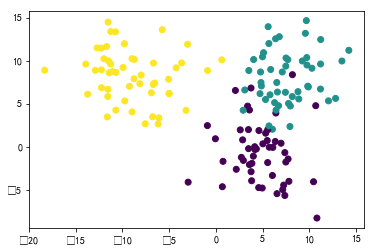

In [416]:
# 画出散点图
plt.scatter(samples[:,0],samples[:,1],c = labels)

In [418]:
# 创建机器学习模型，训练数据
# 决策树
dt.fit(samples,labels).score(samples,labels)

1.0

In [419]:
#提取坐标点，对坐标点进行处理
# 生成整个面的点,用来做预测
x_min,x_max = samples[:,0].min(),samples[:,0].max()
y_min,y_max = samples[:,1].min(),samples[:,1].max()

In [421]:
display(x_min,x_max,y_min,y_max)

-18.319423983763684

14.221750082894411

-8.289485009386647

14.643040881335201

In [425]:
#预测坐标点数据，并进行reshape()
x = np.linspace(x_min,x_max,1000)
y = np.linspace(y_min,y_max,1000)
X,Y = np.meshgrid(x,y)

In [427]:
display(X,X.ravel())

array([[-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
         14.18917634,  14.22175008],
       [-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
         14.18917634,  14.22175008],
       [-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
         14.18917634,  14.22175008],
       ...,
       [-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
         14.18917634,  14.22175008],
       [-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
         14.18917634,  14.22175008],
       [-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
         14.18917634,  14.22175008]])

array([-18.31942398, -18.28685024, -18.25427649, ...,  14.15660259,
        14.18917634,  14.22175008])

In [428]:
z = np.c_[X.ravel(),Y.ravel()]

In [430]:
z.shape

(1000000, 2)

In [431]:
ydt = dt.predict(z)

d:\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(20,15,'过拟合')

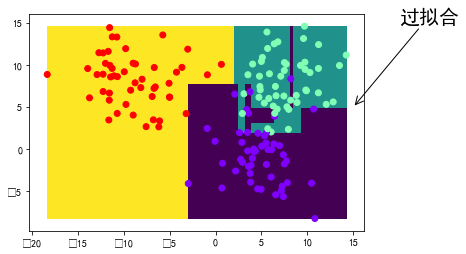

In [446]:
# 画图
plt.pcolormesh(X,Y,ydt.reshape(X.shape))
plt.scatter(samples[:,0],samples[:,1],c=labels,cmap='rainbow')
a = plt.subplot(111)
a.annotate('过拟合',(15,5),(20,15),arrowprops= dict(facecolor='black',arrowstyle="->"),fontsize=20)

In [434]:
# knn算法
knn.fit(samples,labels).score(samples,labels)

0.9333333333333333

In [435]:
yknn = knn.predict(z)

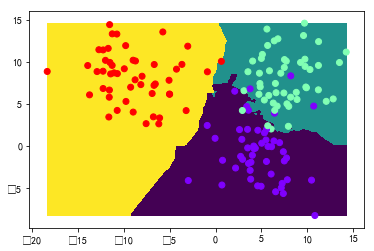

In [448]:
plt.pcolormesh(X,Y,yknn.reshape(X.shape))
plt.scatter(samples[:,0],samples[:,1],c =labels,cmap = 'rainbow')

In [438]:
# 逻辑斯蒂算法
logic.fit(samples,labels).score(samples,labels)

0.9266666666666666

In [439]:
ylogic = logic.predict(z)

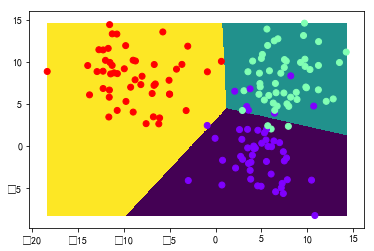

In [440]:
plt.pcolormesh(X,Y,ylogic.reshape(X.shape))
plt.scatter(samples[:,0],samples[:,1],c =labels,cmap = 'rainbow')